# BSGP 7030 Assignment 5 - R
## Maria Spaeth
### Tutorial used: https://machinelearningmastery.com/machine-learning-in-r-step-by-step/
Your First Machine Learning Project in R Step-By-Step by Jason Brownlee

---
---

## 1. Downloading Installing and Starting R

In [3]:
# We need to open the package we want to use for this tutorial

library(caret)
library(kernlab)
library(ggplot2)
library(ellipse)
library(randomForest)

## 2. Load the Data

In [4]:
# R has the iris dataset built into the system so we don't have to download
# the .csv file here

# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [5]:
# Here we are making a validation dataset that we will be able to test our machine learning with
# by splitting our data into 80% learning and 20% validation

# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

## 3. Summarize Dataset

In [6]:
#this shows us the dimensions of the dataset
dim(dataset)

[1] 120   5

In [7]:
# This will list the type for each attribute in our dataset
sapply(dataset,class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [8]:
# Looking at the dataset
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


In [9]:
# This lists the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [10]:
# Summarizing the class dataset (showing number of instances as an absolute count and a percentage)
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [11]:
# showing basic statistics about the dataset
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.350  
 Mean   :5.862   Mean   :3.067   Mean   :3.778   Mean   :1.206  
 3rd Qu.:6.425   3rd Qu.:3.325   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

## Visualise Dataset

In [12]:
# starting with a univariate plot (looking at one variable at a time)

# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

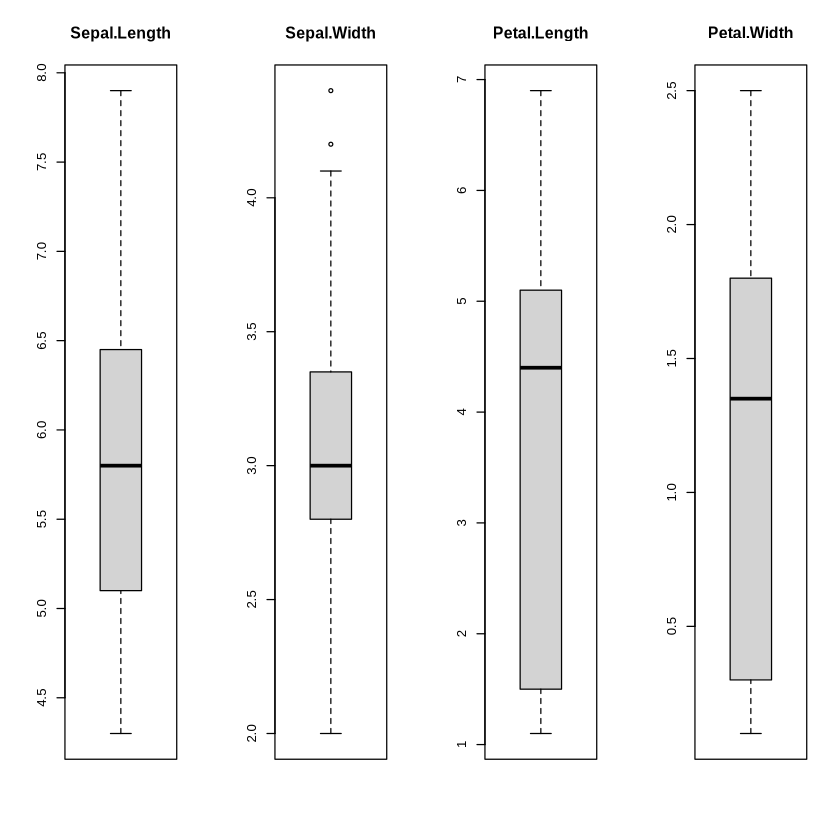

In [13]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

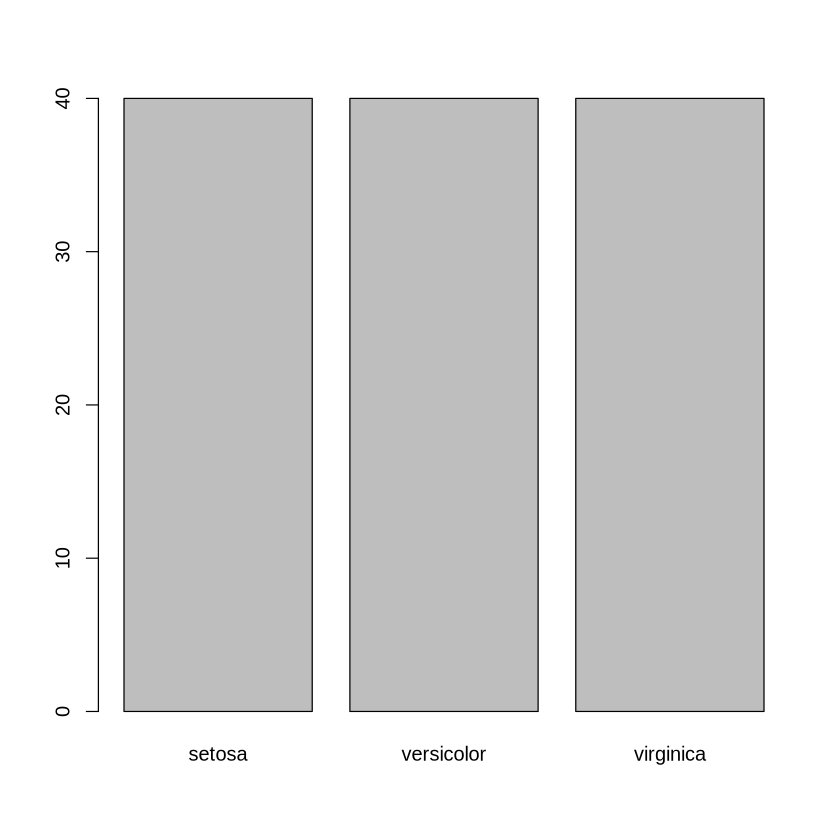

In [14]:
# barplot for class breakdown
plot(y)

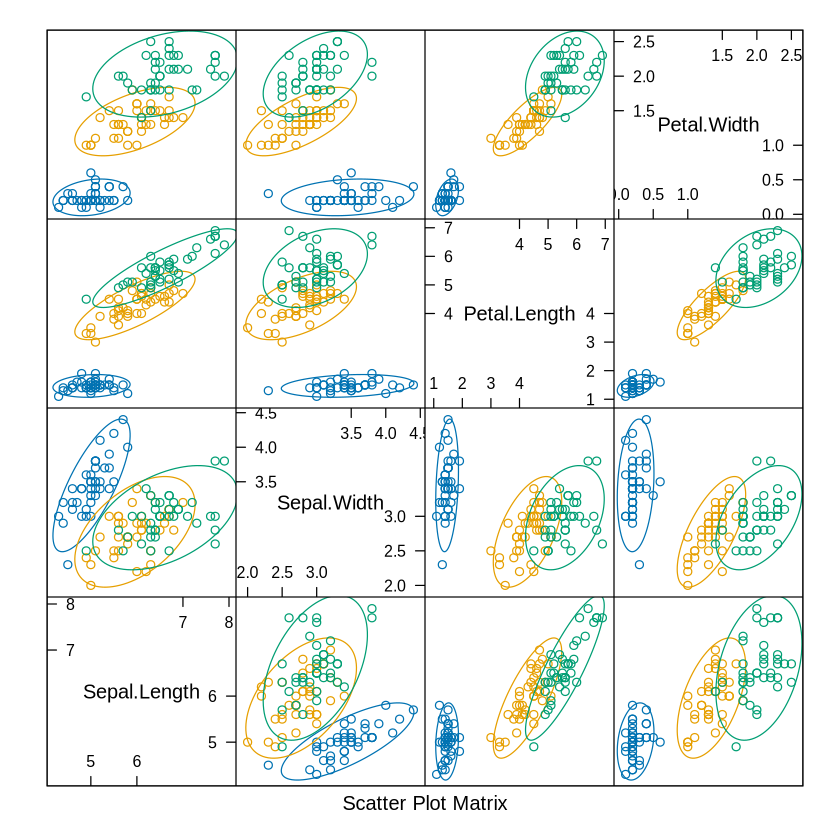

In [15]:
# Looking at multivariate plots
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

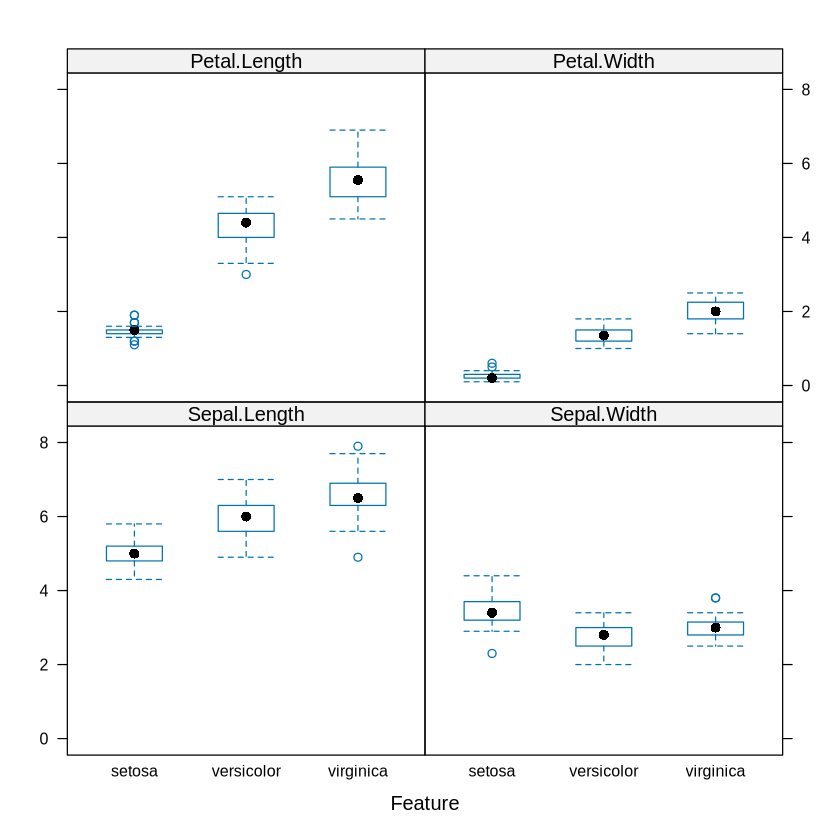

In [16]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

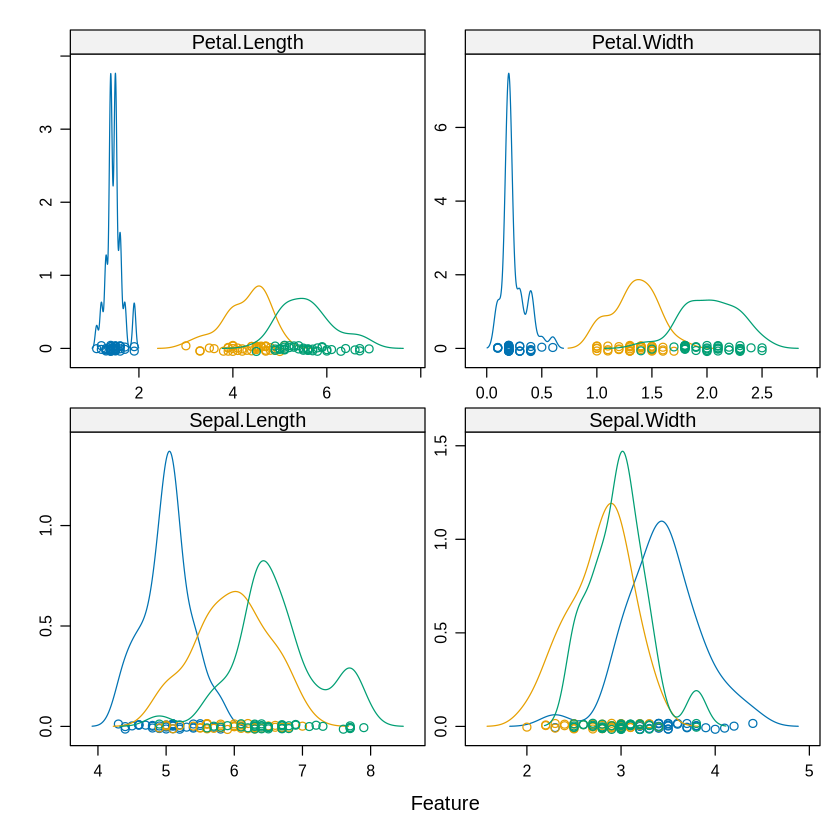

In [17]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## 5. Evaluate Some Algorithms

In [18]:
# We will train on 9 samples and test one 1
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [19]:
# the different algorithms we are using

# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [20]:
# determining which model is the best model for our machine learning
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 0.9375000 1.0000000 0.9750000       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
knn  0.8333333 0.9375000 1.0000000 0.9583333       1    1    0
svm  0.8333333 0.8541667 0.9583333 0.9333333       1    1    0
rf   0.8333333 0.9166667 0.9583333 0.9500000       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 0.90625 1.0000 0.9625       1    1    0
cart 0.750 0.87500 0.9375 0.9125       1    1    0
knn  0.750 0.90625 1.0000 0.9375       1    1    0
svm  0.750 0.78125 0.9375 0.9000       1    1    0
rf   0.750 0.87500 0.9375 0.9250       1    1    0


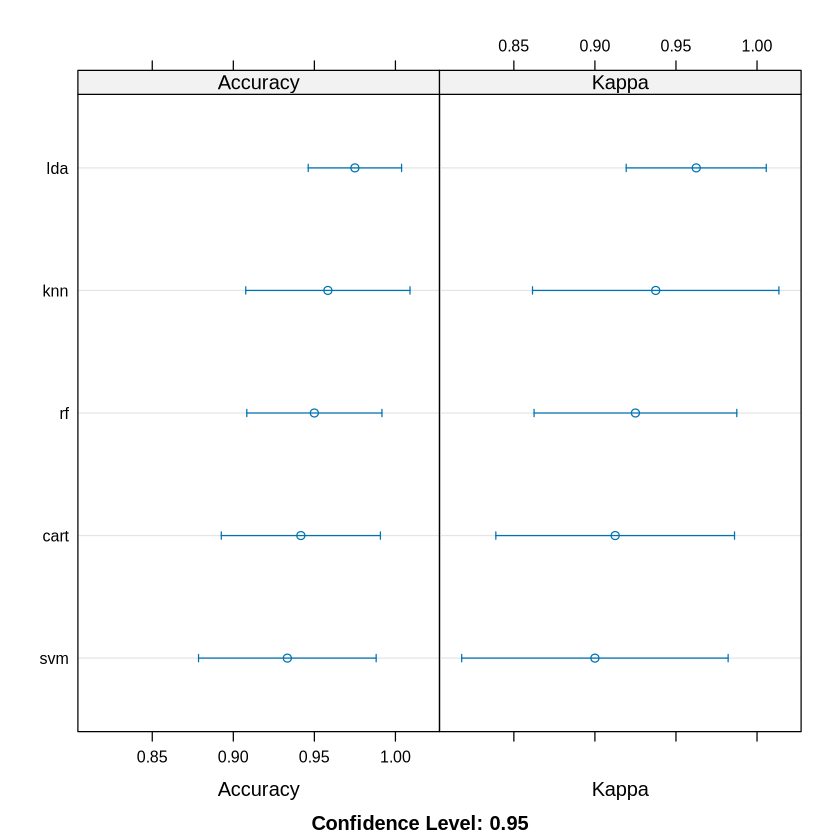

In [21]:
# visualizing our results from the line above
dotplot(results)

In [22]:
# seeing the accuracy of the model that so far seems best suited for our uses
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



## 6. Make Predictions

In [23]:
# testing our model (LDA or lda)
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            